In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import numpy as np
from sklearn.preprocessing import minmax_scale

In [2]:
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'

In [3]:
option_df = pd.read_csv("sim_option_summary.csv")
result_df = pd.read_csv("sim_result_summary.csv", index_col="sim_id")
option_df.drop(columns=["sim_id"], inplace=True)
result_df = result_df.drop("base").reset_index()

In [4]:
df = pd.concat([result_df, option_df], axis=1)
df.set_index("sim_id", inplace=True)

In [5]:
df["pmax_ratio"] = df["battery_pmax"] / df["wind_pmax"]

In [6]:
df["scaled_total_revenue"] = df.groupby(["n_scenario", "participation_mode"]).apply(
    lambda x: pd.DataFrame(minmax_scale(x["Total Revenue"]), x.index)
)

In [7]:
def plot_scaled_revenue_contour(df):
    
    # reformat the data to matplotlib requirements
    # following: https://alex.miller.im/posts/contour-plots-in-python-matplotlib-x-y-z/
    df.sort_values(by=["wind_pmax", "pmax_ratio"], inplace=True)
    Z = df.pivot_table(index="wind_pmax", columns="pmax_ratio", values="scaled_total_revenue").T.values
    X_unique = df["wind_pmax"].unique()
    Y_unique = df["pmax_ratio"].unique()
    X, Y = np.meshgrid(X_unique, Y_unique)
    
    # make the plot
    fig, ax = plt.subplots(figsize=(10,8))
    
    levels = [l/10 for l in range(0, 11)]
    line_colors = ['black' for _ in levels]
    
    cp = ax.contour(X, Y, Z, levels=levels, colors=line_colors)
    cpf = ax.contourf(X,Y,Z, len(levels))
    ax.clabel(cp, fontsize="medium", colors=line_colors)
    
    ax.set_xlabel("Wind Pmax [MW]", fontsize="xx-large")
    ax.set_ylabel("Battery vs. Wind Pmax Ratio", fontsize="xx-large")
    
    ax.set_xticks(X_unique)
    ax.set_yticks(Y_unique)
    ax.tick_params(axis='x',labelsize="x-large")
    ax.tick_params(axis='y', labelsize="x-large")
    
    pm = df["participation_mode"].iloc[0]
    n_scenario = df["n_scenario"].iloc[0]
    ax.set_title(f"Scaled Revenue of {pm} w/ {n_scenario} scenarios", fontsize="xx-large")
    
    
    return ax

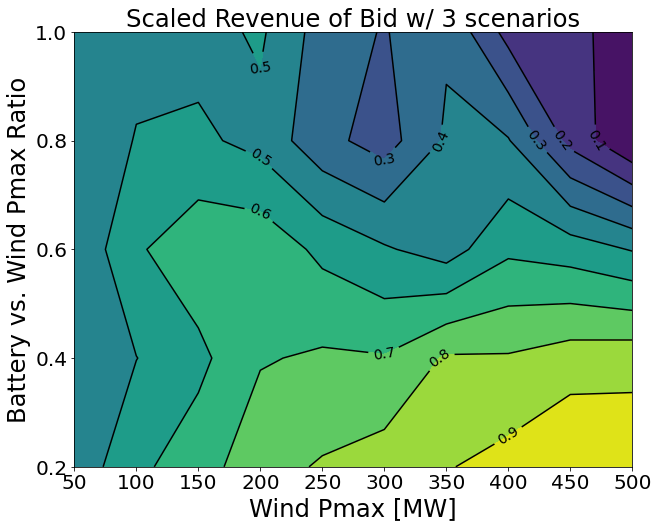

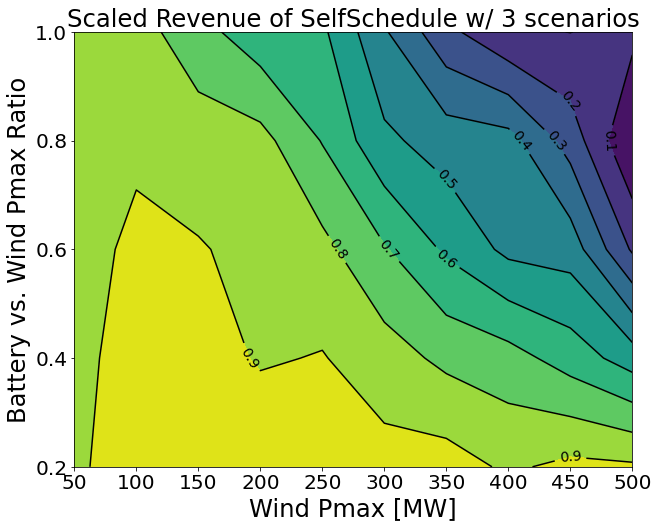

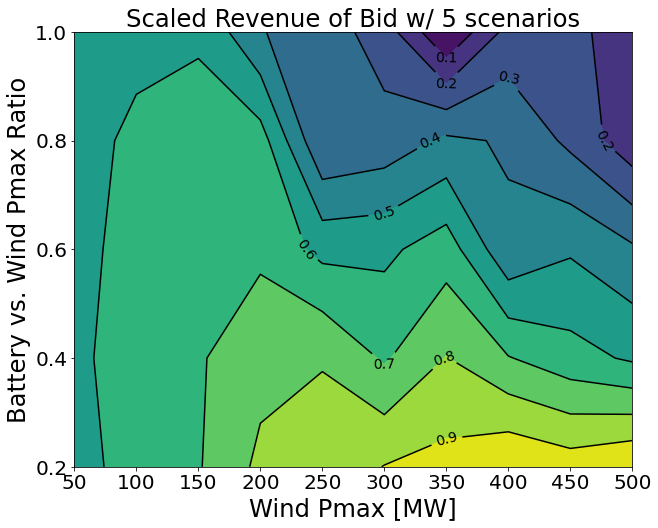

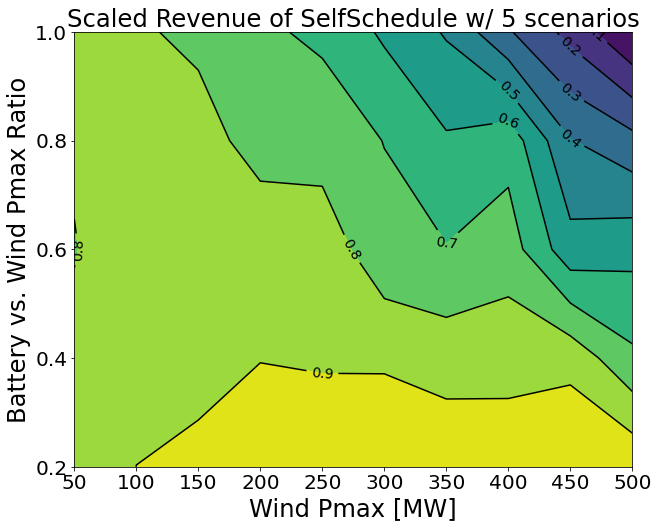

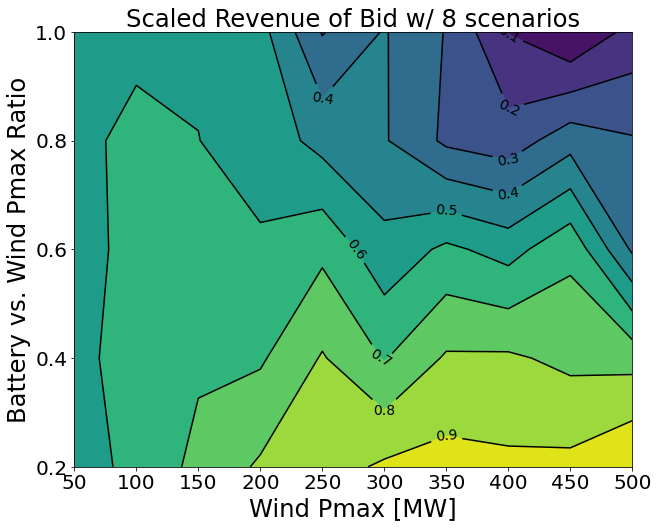

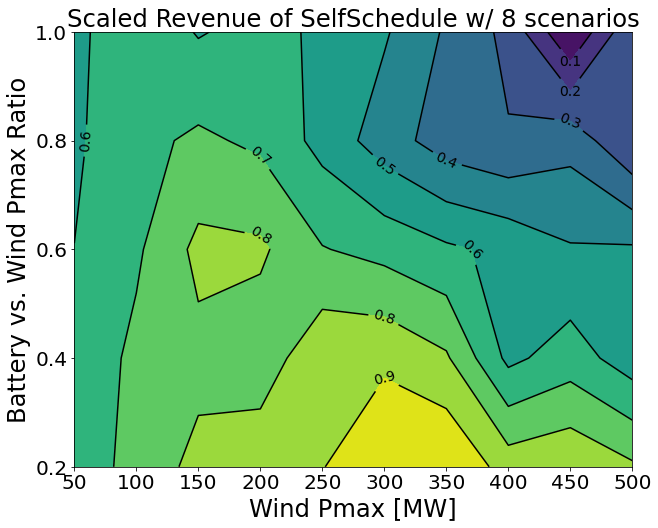

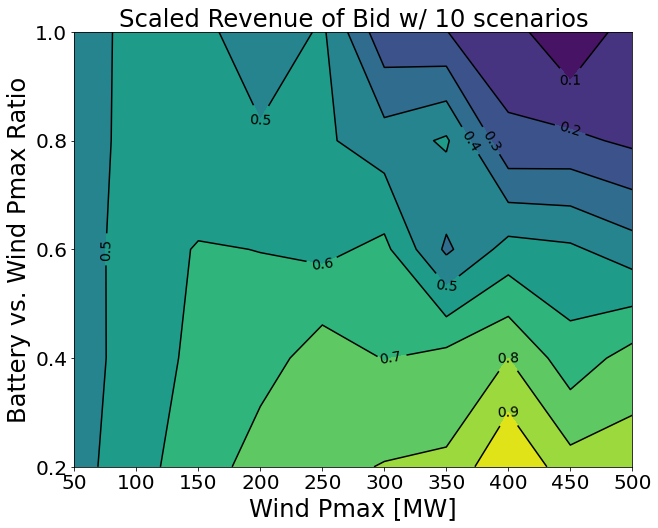

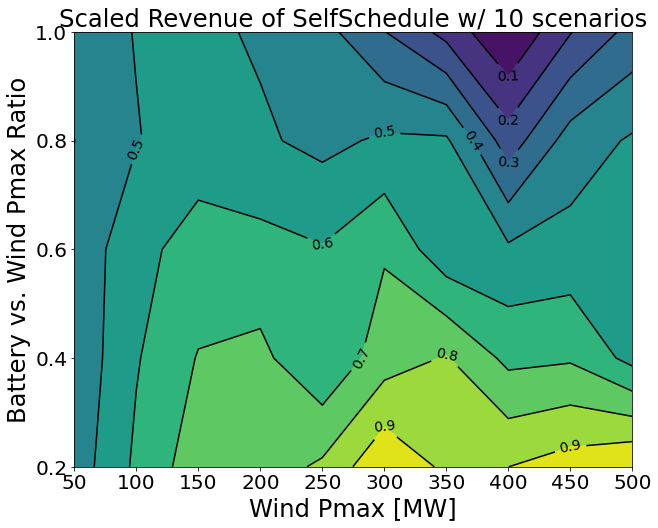

In [8]:
axes = df.groupby(["n_scenario", "participation_mode"]).apply(plot_scaled_revenue_contour)